# Relations Between restaurants scores and boroughs, cuisine types in NYC

### 1. Brief Introduction
My dataset is from enigma, which is acquired from the unannounced inspections of restaurants conducted by New York City Health Department at least once a year. The inspectors check for compliance in food handling, food temperature, personal hygiene and vermin control. Each violation of a regulation gets a certain number of points. At the end of the inspection, the inspector totals the points, and this number is the restaurant's inspection score. The lower the score, the better the grade.

In the dataset, the first few columns shows some basic information such as its camis ID(New York City-Wide Agency Management Information System (CAMIS) ID Number. This is a unique identifier for the entity (restaurant)), name, area located and so on. The rest columns contains information about the inspection date, violation of that restaurant, score and grade.


The project is created to try to identify restaurants with good scores and try to find the relations between scores and borough or cuisine type.

In [118]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import hist

In [374]:
df = pd.read_csv('https://tufts.box.com/shared/static/bumca8ezkpf7epqr956wyeuiog5eejb2.csv')

In [375]:
df.head()

,camis,dba,boro,building,street,zipcode,phone,cuisine_description,inspection_date,action,violation_code,violation_description,critical_flag,score,grade,grade_date,record_date,inspection_type
0,41451985,BRANCACCIO'S FOOD SHOP,BROOKLYN,3011,FORT HAMILTON PARKWAY,11218.0,7184351997,Sandwiches,2017-03-02T00:00:00+00:00,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or condit...,Not Critical,26.0,NaN,NaN,2018-10-09T06:00:44+00:00,Cycle Inspection / Initial Inspection
1,50017896,SANGRIA,QUEENS,2902,FRANCIS LEWIS BLVD,11358.0,7183582727,Spanish,2016-12-23T00:00:00+00:00,Violations were cited in the following area(s).,02H,Food not cooled by an approved method whereby ...,Critical,12.0,A,2016-12-23T00:00:00+00:00,2018-10-09T06:00:44+00:00,Cycle Inspection / Initial Inspection
2,50002037,CHABBA BBQ/FAMILY GRILL & CUISINE,BROOKLYN,786,CONEY ISLAND AVENUE,11218.0,9178938844,Indian,2016-01-04T00:00:00+00:00,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,33.0,NaN,NaN,2018-10-09T06:00:44+00:00,Cycle Inspection / Initial Inspection
3,41172677,GREENLEAF'S/BANANAS,STATEN ISLAND,2655,RICHMOND AVENUE,10314.0,7183707345,Sandwiches/Salads/Mixed Buffet,2015-06-22T00:00:00+00:00,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or condit...,Not Critical,18.0,NaN,NaN,2018-10-09T06:00:44+00:00,Cycle Inspection / Initial Inspection
4,41583191,QUEZADA RESTAURANT,BROOKLYN,1212,FLATBUSH AVENUE,11226.0,7182820622,"Latin (Cuban, Dominican, Puerto Rican, South &...",2018-01-23T00:00:00+00:00,Establishment Closed by DOHMH. Violations wer...,02G,Cold food item held above 41Âº F (smoked fish ...,Critical,30.0,NaN,NaN,2018-10-09T06:00:44+00:00,Cycle Inspection / Re-inspection


### 2. Data clean
Clean the data, drop columns that will not be used, remove rows of scores that don't have values. In my project, I will not use the total grade to evaluate the restaurant because in this dataset, most restauratns only have scores, instead of grades.

Cleaning data would be helpful when picking the data and to avoid mistakes.

Drop the 'NAN' values in 'score' column

In [378]:
df_clean = df.drop(['camis', 'building', 'street', 'zipcode', 'phone', 'inspection_date', 'action', 'violation_code', 'critical_flag', 'grade', 'grade_date', 'record_date', 'inspection_type'], axis = 1)
df_val = df_clean.loc[df_clean['score'].dropna().index]
df_val.head()

,dba,boro,cuisine_description,violation_description,score
0,BRANCACCIO'S FOOD SHOP,BROOKLYN,Sandwiches,Facility not vermin proof. Harborage or condit...,26.0
1,SANGRIA,QUEENS,Spanish,Food not cooled by an approved method whereby ...,12.0
2,CHABBA BBQ/FAMILY GRILL & CUISINE,BROOKLYN,Indian,Evidence of mice or live mice present in facil...,33.0
3,GREENLEAF'S/BANANAS,STATEN ISLAND,Sandwiches/Salads/Mixed Buffet,Facility not vermin proof. Harborage or condit...,18.0
4,QUEZADA RESTAURANT,BROOKLYN,"Latin (Cuban, Dominican, Puerto Rican, South &...",Cold food item held above 41Âº F (smoked fish ...,30.0


### 3. Find the score range and prepare for plot
It is necessary to know the score range in the dataset in order to make a well-shaped plot.

Since the maximum score is 156 and the minimun score is -1, I set three standards for the score, which are less than 50, between 50 and 100, more than 100. As the smaller the score is, the better the restaurants are, I plot the number of restaurants in each cuisine type to compare.

In [379]:
print('biggest score =', df_val['score'].max(), ', smallest score =', df_val['score'].min())

biggest score = 156.0 , smallest score = -1.0


In [381]:
#List all boroughs and pass them to array "boro_array"
boro_array = df_val['boro'].unique()
boro_array

array(['BROOKLYN', 'QUEENS', 'STATEN ISLAND', 'MANHATTAN', 'BRONX',
       'Missing'], dtype=object)

In [383]:
#get the dataframe of each borough individually
df_brooklyn = df_val[df_val['boro'] == 'BROOKLYN']
df_queens = df_val[df_val['boro'] == 'QUEENS']
df_sta_island = df_val[df_val['boro'] == 'STATEN ISLAND']
df_manhattan = df_val[df_val['boro'] == 'MANHATTAN']
df_bronx = df_val[df_val['boro'] == 'BRONX']
print('Number of restaurants in every borough:\nBrooklyn:', len(df_brooklyn),
     '\nQueens:', len(df_queens),
     '\nStaten', len(df_sta_island),
     '\nManhattan', len(df_manhattan),
     '\nBronx', len(df_bronx))

Number of restaurants in every borough:
Brooklyn: 91166 
Queens: 81072 
Staten 12598 
Manhattan 142536 
Bronx 32489


### 4. Plot the scores related to boroughs

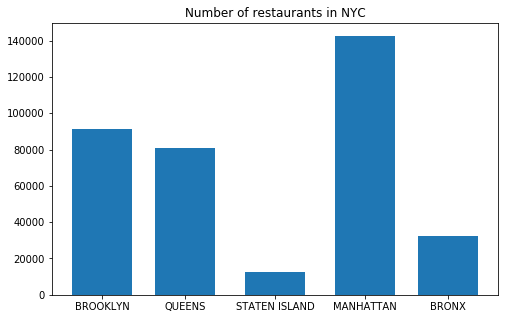

None
AxesSubplot(0.125,0.125;0.775x0.755)


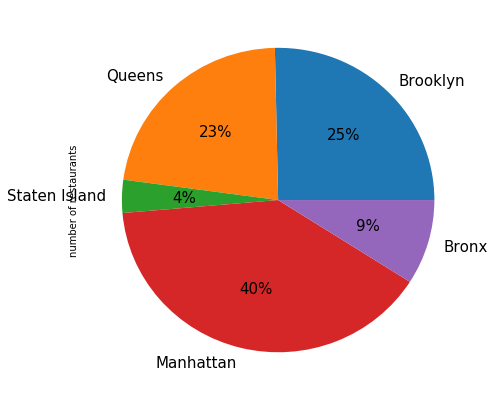

In [192]:
#barchart
number_restaurants = [len(df_brooklyn), len(df_queens), len(df_sta_island), len(df_manhattan), len(df_bronx)]
y_pos = [0,1.1,2.3,3.5,4.6]
plt.bar(y_pos, number_restaurants, align='center')
plt.xticks(y_pos, boros)
plt.title('Number of restaurants in NYC')
plt.rcParams['figure.figsize'] = (8, 5)
print(plt.show())

#piechart
df_pie = pd.DataFrame({'number of restaurants': [len(df_brooklyn), len(df_queens), len(df_sta_island), len(df_manhattan), len(df_bronx)]},
                 index=['Brooklyn', 'Queens', 'Staten Island', 'Manhattan', 'Bronx'])
pie_chart = df_pie.plot.pie(y = 'number of restaurants', figsize = (7,7), legend = False, autopct='%1.0f%%', fontsize = 15)
print(pie_chart)

In [384]:
#get the array of score under 50
score_under50 = [len(df_brooklyn[df_brooklyn['score'] <= 50]), len(df_queens[df_queens['score'] <= 50]),
                len(df_sta_island[df_sta_island['score'] <= 50]), len(df_manhattan[df_manhattan['score'] <= 50]),
                len(df_bronx[df_bronx['score'] <= 50])]
print('Scores in Brooklyn, Queens, Staten Island, Manhattan, Bronx:\nScores <= 50:     ', score_under50)

#get the array of score between 50 and 100
score_50_to_100 = [len(df_brooklyn[(df_brooklyn['score'] > 50) & (df_brooklyn['score'] < 100)]),
                   len(df_queens[(df_queens['score'] > 50) & (df_queens['score'] < 100)]),
                   len(df_sta_island[(df_sta_island['score'] > 50) & (df_sta_island['score'] < 100)]),
                   len(df_manhattan[(df_manhattan['score'] > 50) & (df_manhattan['score'] < 100)]),
                   len(df_bronx[(df_bronx['score'] > 50) & (df_bronx['score'] < 100)])]
print('50 < Scores < 100:', score_50_to_100)

#get the array of score over 100
score_over100 = [len(df_brooklyn[df_brooklyn['score'] >= 100]), len(df_queens[df_queens['score'] >= 100]),
                 len(df_sta_island[df_sta_island['score'] >= 100]), len(df_manhattan[df_manhattan['score'] >= 100]),
                 len(df_bronx[df_bronx['score'] >= 100])]
print('Scores >= 100:    ', socre_over100)

Scores in Brooklyn, Queens, Staten Island, Manhattan, Bronx:
Scores <= 50:      [87114, 78125, 12212, 137324, 31422]
50 < Scores < 100: [3854, 2813, 379, 5044, 1028]
Scores >= 100:     [198, 134, 7, 168, 39]


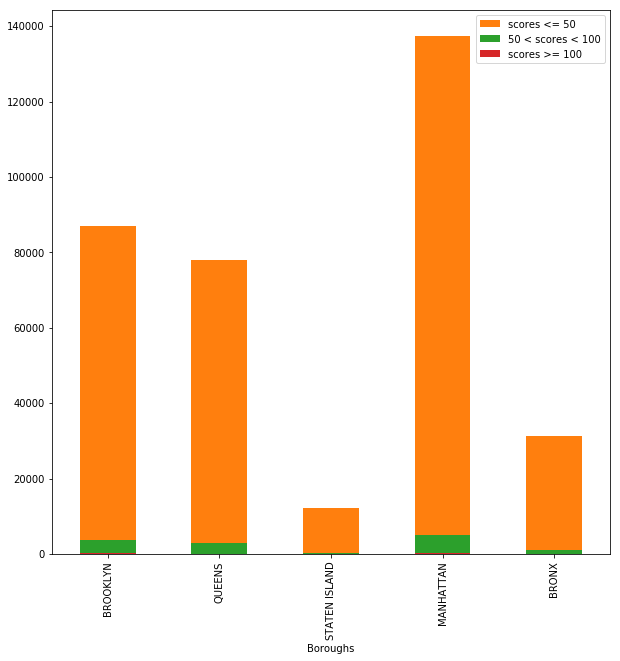

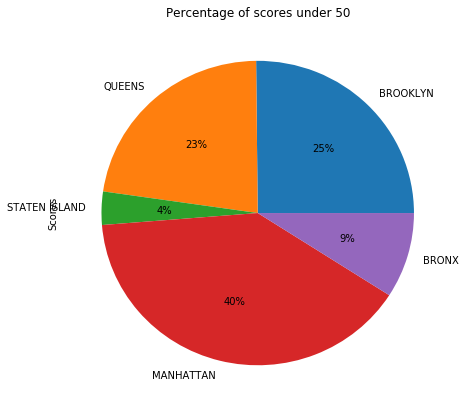

In [385]:
df_sco = pd.DataFrame({'scores <= 50': score_under50, '50 < scores < 100': score_50_to_100, 'scores >= 100' : score_over100})
df_sco['Boroughs'] = boro_array[0:5]
ax = df_sco.plot(x = 'Boroughs', y = 'scores <= 50', kind = 'bar', color = 'C1')
df_sco.plot(x = 'Boroughs', y = '50 < scores < 100', kind="bar", ax=ax, color="C2")
df_sco.plot(x = 'Boroughs', y= 'scores >= 100', kind="bar", ax=ax, color="C3")
plt.show()

df_under25 = pd.DataFrame({'Scores': score_under50},
                          index = boro_array[0:5])
df_under25.plot.pie(y='Scores', figsize=(7, 7), legend = False,autopct='%1.0f%%', title = 'Percentage of scores under 50'  )


### 5. Statistics related to cuisine types

In [386]:
#numebr of different cuisine types in the dataset
len(df_val['cuisine_description'].value_counts())

85

In [388]:
#ranked by restaurants counts
df_val['cuisine_description'].value_counts().head(10)

American                                                            78594
Chinese                                                             38202
CafÃ©/Coffee/Tea                                                    16218
Latin (Cuban, Dominican, Puerto Rican, South & Central American)    16101
Pizza                                                               15985
Italian                                                             14945
Mexican                                                             14447
Japanese                                                            12875
Caribbean                                                           12570
Bakery                                                              11084
Name: cuisine_description, dtype: int64

In [389]:
cuisine_list = df_val['cuisine_description'].value_counts().head(10).index.tolist()
cuisine_mean_score = [] #creat a list to save mean score for each cuisine
cuisine_median_score = [] #save median score for each cuisine
for i in range(10):
    cuisine_mean_score.append(df_val[df_val['cuisine_description'] == cuisine_list[i]].score.mean())
    cuisine_median_score.append(df_val[df_val['cuisine_description'] == cuisine_list[i]].score.median())

In [390]:
print('mean score:\n', cuisine_mean_score, '\nmedian score:\n', cuisine_median_score)

mean score:
 [18.24477695498384, 20.88613161614575, 17.025280552472562, 20.99428606918825, 18.823459493274946, 19.132619605219137, 20.242264830068525, 19.833398058252428, 21.79244232299125, 19.731865752435944] 
median score:
 [13.0, 17.0, 12.0, 18.0, 13.0, 14.0, 17.0, 16.0, 18.0, 15.0]


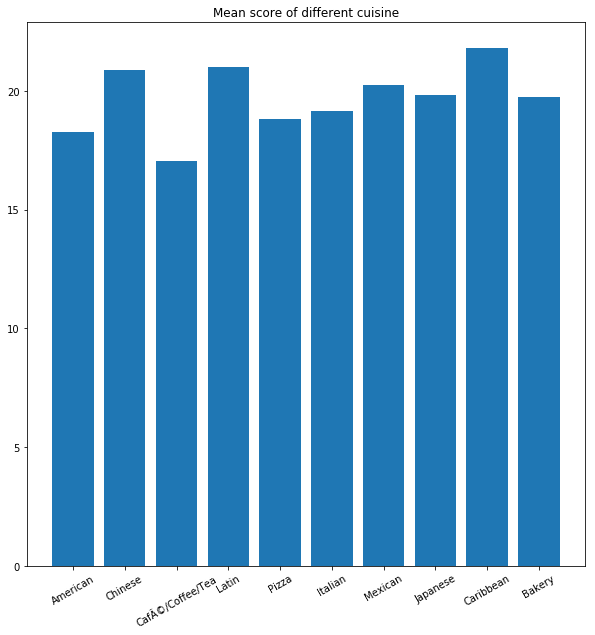

None


In [391]:
y_pos = range(10)
cuisine_list[3] = 'Latin'
plt.bar(y_pos, cuisine_mean_score, align='center')
plt.xticks(y_pos, cuisine_list, fontsize = 10, rotation = 30)
plt.title('Mean score of different cuisine')
plt.rcParams['figure.figsize'] = (10, 10)
print(plt.show())

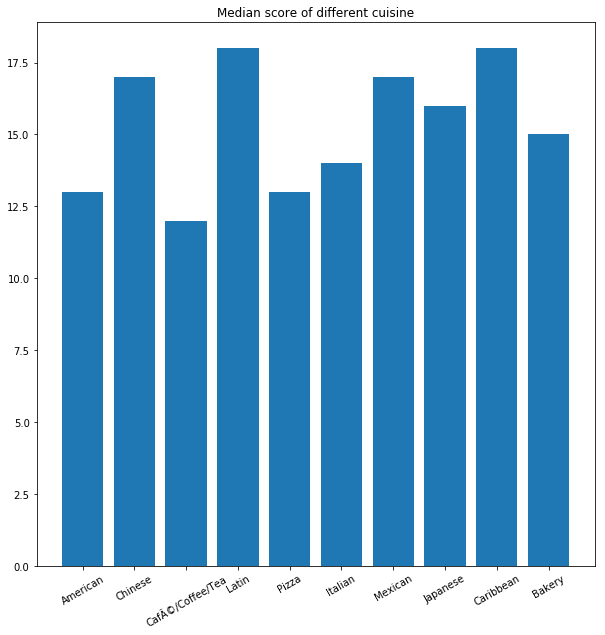

None


In [392]:
y_pos = range(10)
plt.bar(y_pos, cuisine_median_score, align='center')
plt.xticks(y_pos, cuisine_list, fontsize = 10, rotation = 30)
plt.title('Median score of different cuisine')
plt.rcParams['figure.figsize'] = (10, 10)
print(plt.show())